In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

In [4]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [5]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [6]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [7]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Majoron emission

In [8]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

majoRL_dist0 = np.loadtxt(data_path + '/majorons/TotalEnergyDist_RL_76Ge.txt', usecols=(1), unpack=True)
majoRR_dist0 = np.loadtxt(data_path + '/majorons/TotalEnergyDist_RR_76Ge.txt', usecols=(1), unpack=True)

majoRL_dist0 = np.insert(majoRL_dist0, 0, 0, axis=0)
majoRR_dist0 = np.insert(majoRR_dist0, 0, 0, axis=0)

majoRL_dist = majoRL_dist0 / np.sum(majoRL_dist0)
majoRR_dist = majoRR_dist0 / np.sum(majoRR_dist0)

In [9]:
def distribution_exotic_2nbb(x, n):
    ## x input must be given in keV
    Qbb = 2039
    me  =  511
    x0  = Qbb / me
    x   =   x / me
    y   = (pow(x,4) + 10*pow(x,3) + 40*pow(x,2) + 60*x + 30) * x * pow((x0-x), n)
    y   = y / np.sum(y) # Normalize to area = 1
    return y

majo_n1_dist = distribution_exotic_2nbb(bins, 1)
majo_n2_dist = distribution_exotic_2nbb(bins, 2)
majo_n3_dist = distribution_exotic_2nbb(bins, 3)
majo_n7_dist = distribution_exotic_2nbb(bins, 7)

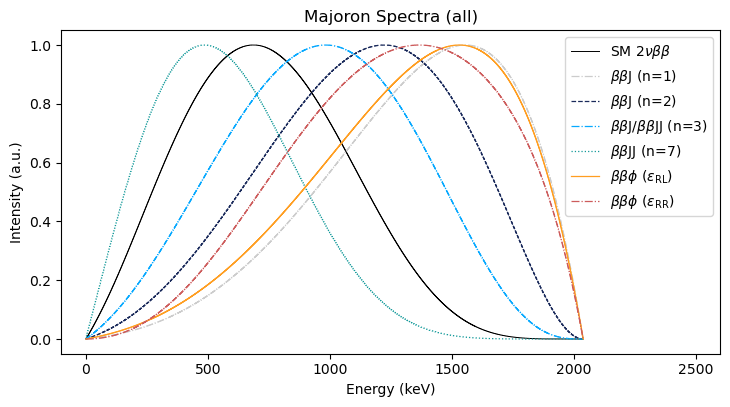

In [10]:
fig, ax = plt.subplots(figsize=(8.5, 4.2))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')
ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Majoron Spectra (all)')
ax.legend();

# Sensitivity:

### L200 background data

In [11]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

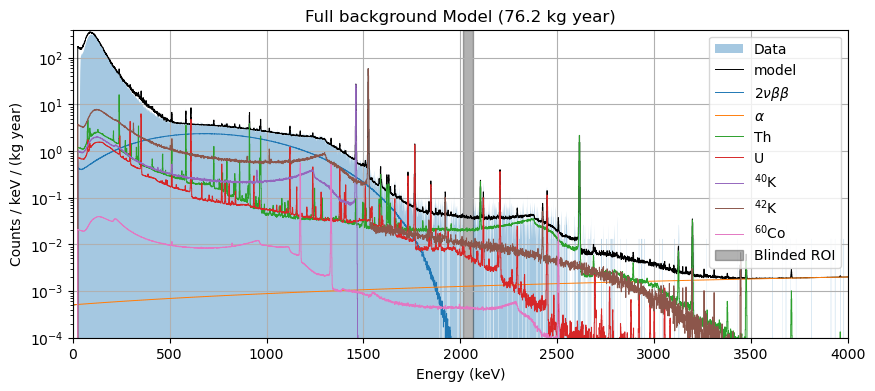

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

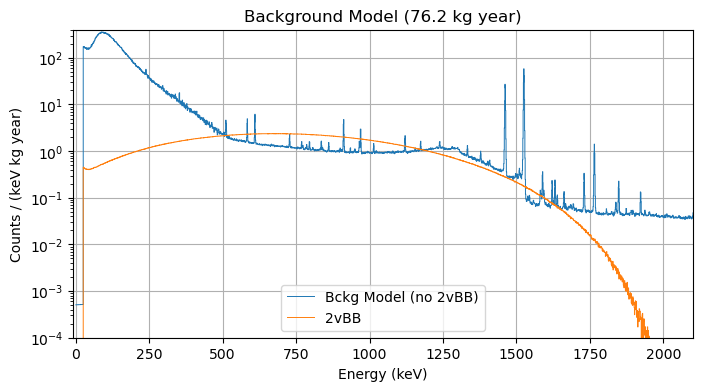

In [13]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Majoron emission:

In [36]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin = 30
max_bin = 2010

# L200_data_exposure = 76.2 kg yr
exposure = L200_data_exposure

NA = 6.022141e23 # Avogadro's constant: atoms / mol
mA = 75.9214027e-3 # kg / mol of 76Ge

# Efficiency. explain?
eff = 0.75

# Input to fitting loop
labels       = ['n=1','n=2','n=3','n=7','non-standard-RR','non-standard-RL']
labels_fancy = [r'$\beta\beta$J (n=1)', r'$\beta\beta$J (n=2)', r'$\beta\beta$J/$\beta\beta$JJ (n=3)',
                r'$\beta\beta$JJ (n=7)', r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)',
                r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)']
signal_dists = [majo_n1_dist, majo_n2_dist, majo_n3_dist, majo_n7_dist, majoRR_dist, majoRL_dist]
#n_max_list   = [500, 3000, 5000, 5000, 2000, 2000] # Lars values
n_max_list   = [2000, 2500, 6000, 15000, 3000, 1500] # Max signal counts to scan 

# ===========================================================================

# Cut the distribution in the fit range
limits              = (min_bin, max_bin+1)
binning             = max_bin + 1 - min_bin
bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of bckg and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',     0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg',   Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB',   NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

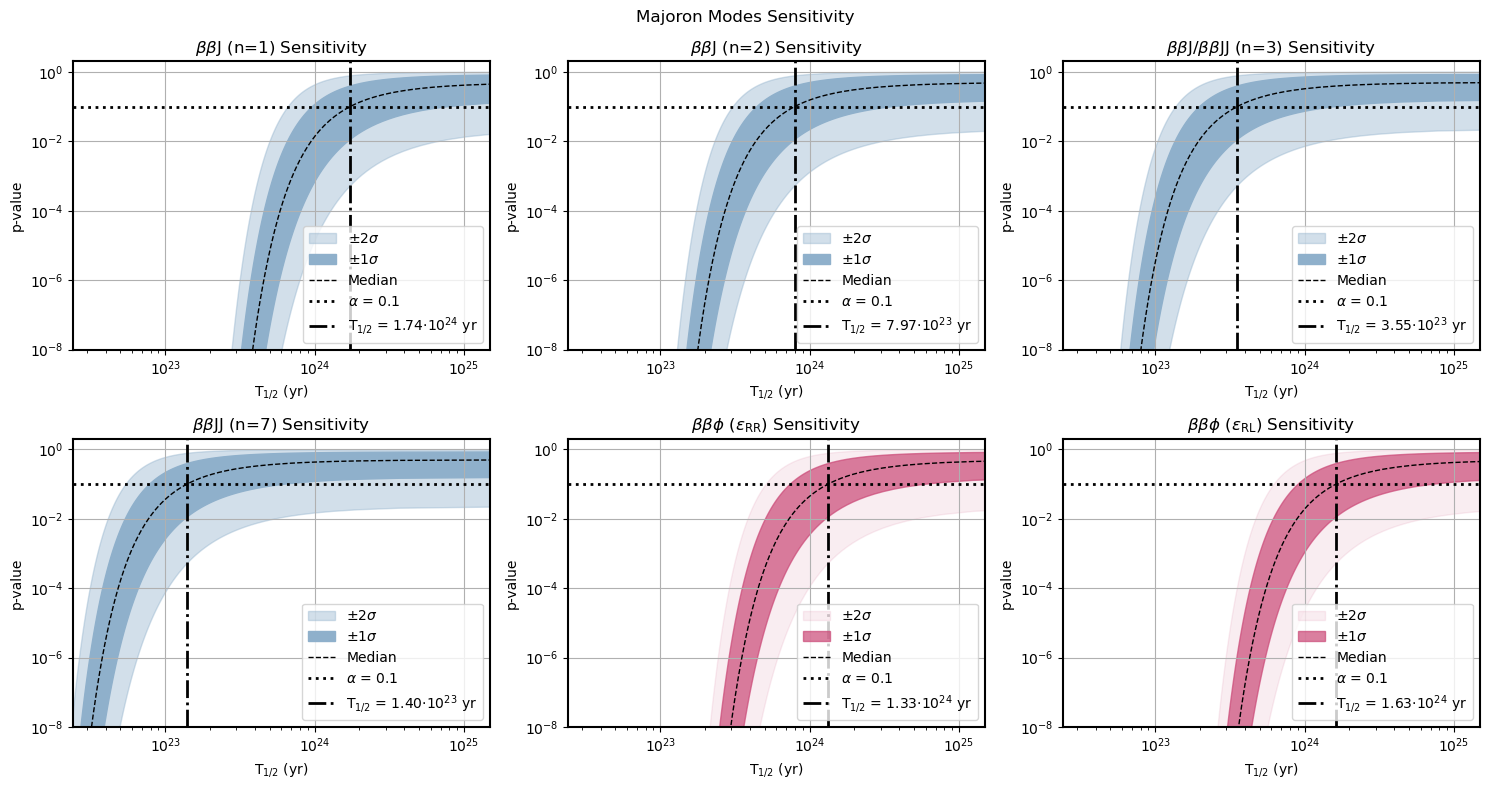

In [27]:
n_rows      = 2
n_columns   = len(signal_dists) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 8))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Majoron Modes Sensitivity')

all_half_life_sens = []
for idx, (lab, lab_fancy, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, signal_dists, n_max_list)):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    # Model (signal + bckg)
    # Since both signal_pdf and bckg_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the real_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_bckg > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    #n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    n_signal_hypot_vals = np.linspace(10., n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)

    full_spec_cts      = n_signal_hypot_vals / majoron_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life
    
    if idx < 4:
        col = '#8FB0CB'
        alp = 1
    else:
        col = '#CB4977'
        alp = 0.7

    # Calculate sensitivity
    try:
        n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
        n_signal_full_spec_sens = n_signal_sens / majoron_fitrange_eff
        real_full_spec_sens     = n_signal_full_spec_sens / eff
        half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
        inv_half_life_sens      = 1 / half_life_sens
        all_half_life_sens.append(half_life_sens)
        
        # Plot result on both individual and combined plots
        fig, ax = plt.subplots()
        ax_to_plot = [ax, combined_ax[idx]]
        for ax in ax_to_plot:
            ax.fill_between(half_life, expected[3], expected[4], color=col,    label=r'$\pm 2\sigma$', alpha=alp-0.6)
            ax.fill_between(half_life, expected[1], expected[2], color=col,    label=r'$\pm 1\sigma$', alpha=alp)
            ax.plot(half_life, expected[0], lw=1, ls='dashed',  c='black',     label='Median')
            ax.axhline(alpha,               lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
            ax.axvline(half_life_sens,      lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
            ax.grid()
            ax.legend(loc='lower right')
            set_border_line_width(ax, 1.5)
            ax.set_xlabel(r'T$_{1/2}$ (yr)')
            ax.set_ylabel('p-value')
            #ax.set_xlim(min(half_life), max(half_life))
            ax.set_xlim(2.4e22, 1.5e25)
            ax.set_ylim(1e-8, 2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(lab_fancy + ' Sensitivity')
        #fig.savefig('./images/majoron_' + lab + '.pdf', bbox_inches='tight')
        plt.close(fig)
    except IndexError:
        print(f'There are no zero crossings for {lab_fancy}')
        continue
        break

combined_fig.tight_layout()
#combined_fig.savefig('./images/majoron_combined.pdf', bbox_inches='tight')
plt.show()

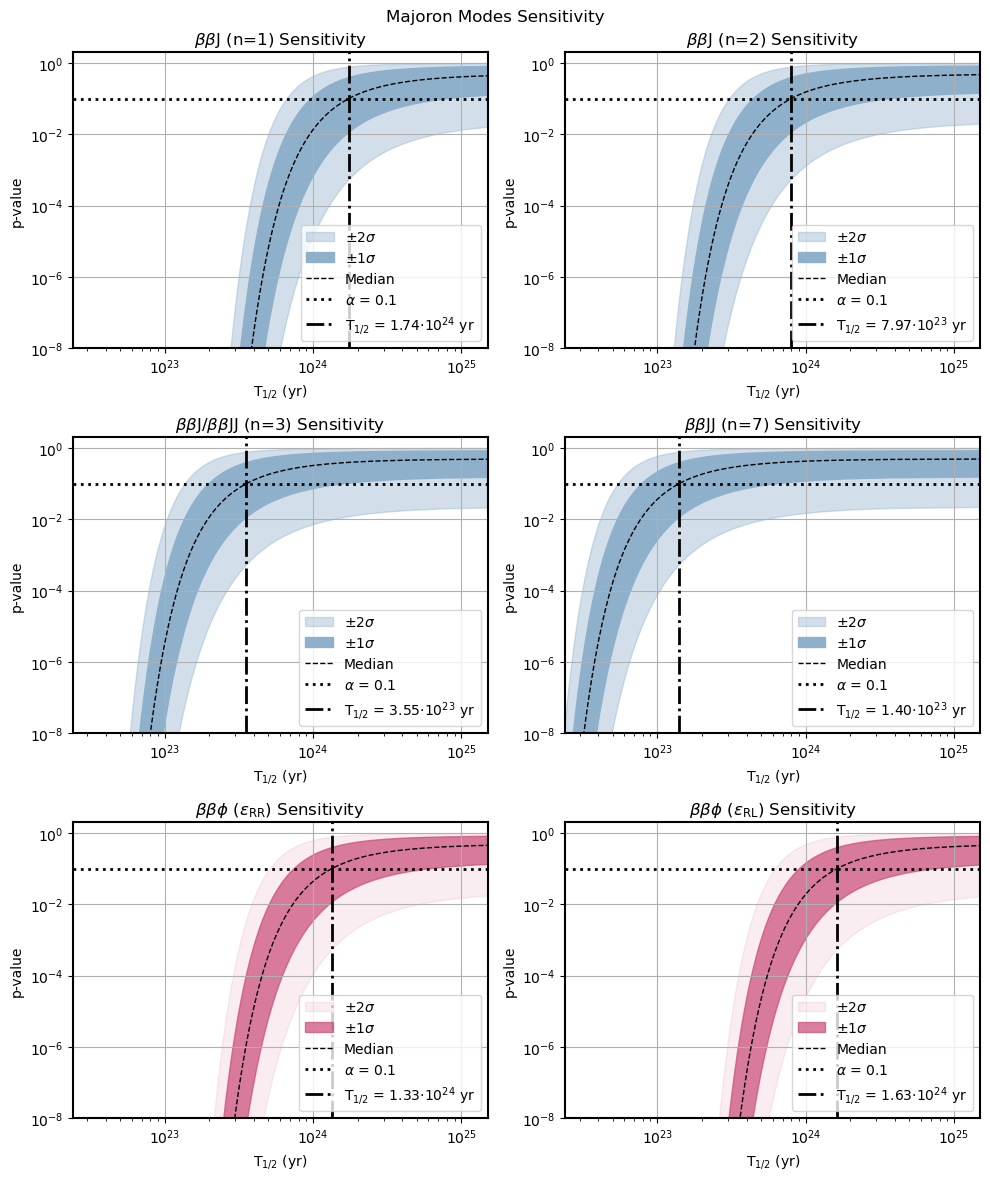

In [37]:
n_rows      = 3
n_columns   = len(signal_dists) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(10, 12))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Majoron Modes Sensitivity')

all_half_life_sens = []
for idx, (lab, lab_fancy, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, signal_dists, n_max_list)):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    # Model (signal + bckg)
    # Since both signal_pdf and bckg_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the real_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_bckg > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    #n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    n_signal_hypot_vals = np.linspace(10., n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)

    full_spec_cts      = n_signal_hypot_vals / majoron_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life
    
    if idx < 4:
        col = '#8FB0CB'
        alp = 1
    else:
        col = '#CB4977'
        alp = 0.7

    # Calculate sensitivity
    try:
        n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
        n_signal_full_spec_sens = n_signal_sens / majoron_fitrange_eff
        real_full_spec_sens     = n_signal_full_spec_sens / eff
        half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
        inv_half_life_sens      = 1 / half_life_sens
        all_half_life_sens.append(half_life_sens)
        
        # Plot result on both individual and combined plots
        fig, ax = plt.subplots()
        ax_to_plot = [ax, combined_ax[idx]]
        for ax in ax_to_plot:
            ax.fill_between(half_life, expected[3], expected[4], color=col,    label=r'$\pm 2\sigma$', alpha=alp-0.6)
            ax.fill_between(half_life, expected[1], expected[2], color=col,    label=r'$\pm 1\sigma$', alpha=alp)
            ax.plot(half_life, expected[0], lw=1, ls='dashed',  c='black',     label='Median')
            ax.axhline(alpha,               lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
            ax.axvline(half_life_sens,      lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
            ax.grid()
            ax.legend(loc='lower right')
            set_border_line_width(ax, 1.5)
            ax.set_xlabel(r'T$_{1/2}$ (yr)')
            ax.set_ylabel('p-value')
            #ax.set_xlim(min(half_life), max(half_life))
            ax.set_xlim(2.4e22, 1.5e25)
            ax.set_ylim(1e-8, 2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(lab_fancy + ' Sensitivity')
        plt.close(fig)
    except IndexError:
        print(f'There are no zero crossings for {lab_fancy}')
        continue
        break

combined_fig.tight_layout()
#combined_fig.savefig('./images/majoron_combined_vertical.pdf', bbox_inches='tight')
plt.show()

In [21]:
# Nuclear Matrix Elements
gA2           = math.pow(1.2724,2)
M_0n_1        = 2.66 
M_0n_2        = 6.04 
NME_n3_single = 0.381
NME_n3_double = 0.0026
NME_n7        = 0.0026

# Phase space factors
ps_n1_single = 44.2e-18
ps_n3_single = 0.073e-18
ps_n3_double = 0.22e-18
ps_n7_double = 0.420e-18

import warnings

def risky_function():
    warnings.warn("This is a RuntimeWarning", RuntimeWarning)

def coupling(half_life_value, nuclear_matrix_elements, phase_space, m):
    # m=1 for single emission, m=2 for double emission
    temp = 1. / (half_life_value * pow(gA2, 2) * phase_space * pow(nuclear_matrix_elements, 2))
    return pow(temp, 1 / (2 * m))

convRR = 3.65e21 # yr
convRL = 1.91e17 # yr
def nonstandard_coupling(conv, half_life_value):
    return pow(conv / half_life_value, 1 / 2)

for lab, lab_fancy, half_life_sens in zip(labels, labels_fancy, all_half_life_sens):
    g = 0
    
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("error", RuntimeWarning)
            risky_function()
            
        if lab == 'n=1':
            print('Eyyy', coupling(half_life_sens, M_0n_2, ps_n1_single, 1))
            g = [coupling(half_life_sens, M_0n_2, ps_n1_single, 1), coupling(half_life_sens, M_0n_1, ps_n1_single, 1)]
        elif lab =='n=3':
            g = [coupling(half_life_sens, NME_n3_single, ps_n3_single, 1), coupling(half_life_sens, NME_n3_double, ps_n3_double, 2)]
        elif lab =='n=7':
            g = coupling(half_life_sens, NME_n7, ps_n7_double, 2)
        elif lab =='non-standard-RR':
            g = nonstandard_coupling(convRR, half_life_sens)
        elif lab =='non-standard-RL':
            g = nonstandard_coupling(convRL, half_life_sens)

    except RuntimeWarning as e:
        print(f"Caught a RuntimeWarning: {e}")
        continue

    
    print(('Model = {}, inverse of the half-life = {}, half-life = {} yr, Coupling = {}'.format(lab_fancy, 1 / half_life_sens, half_life_sens, g)))
    

Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning


## Energy range = (500-2010) keV

In [29]:
# Fit range left endpoints min and max inclusive [min, max]
min_bin    =  500
max_bin    = 2010
n_max_list = [2000, 2500, 6000, 15000, 3000, 1500] # Max signal counts to scan 

limits              = (min_bin, max_bin+1)
binning             = max_bin + 1 - min_bin
bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',     0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg',   Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB',   NvvBB, 0, step_size=0.01)

bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

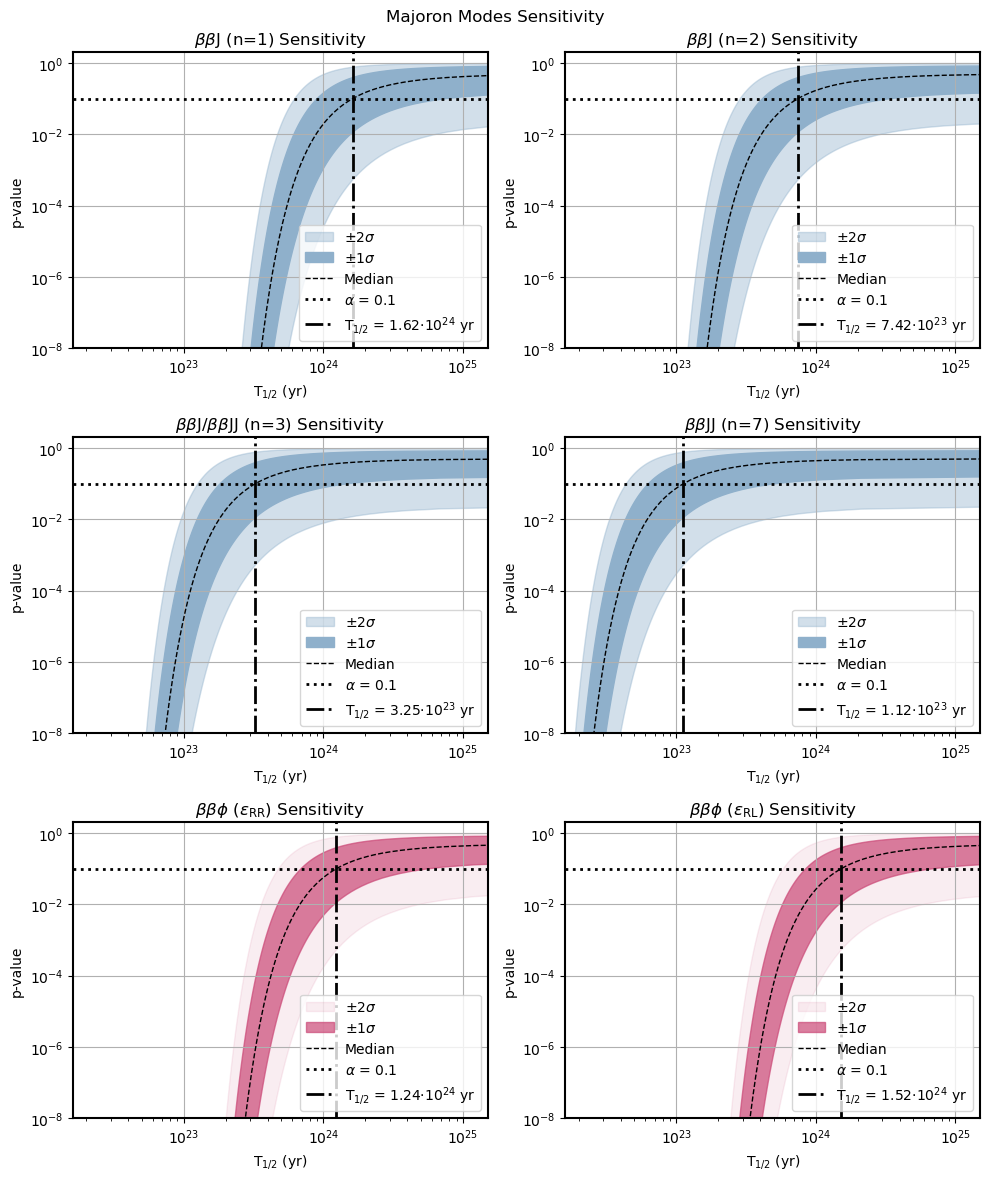

In [35]:
n_rows      = 3
n_columns   = len(signal_dists) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(10, 12))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Majoron Modes Sensitivity')

all_half_life_sens = []
for idx, (lab, lab_fancy, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, signal_dists, n_max_list)):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypot_vals = np.linspace(10., n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)

    full_spec_cts      = n_signal_hypot_vals / majoron_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life
    
    if idx < 4:
        col = '#8FB0CB'
        alp = 1
    else:
        col = '#CB4977'
        alp = 0.7

    # Calculate sensitivity
    try:
        n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
        n_signal_full_spec_sens = n_signal_sens / majoron_fitrange_eff
        real_full_spec_sens     = n_signal_full_spec_sens / eff
        half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
        inv_half_life_sens      = 1 / half_life_sens
        all_half_life_sens.append(half_life_sens)
        
        # Plot result on both individual and combined plots
        fig, ax = plt.subplots()
        ax_to_plot = [ax, combined_ax[idx]]
        for ax in ax_to_plot:
            ax.fill_between(half_life, expected[3], expected[4], color=col,    label=r'$\pm 2\sigma$', alpha=alp-0.6)
            ax.fill_between(half_life, expected[1], expected[2], color=col,    label=r'$\pm 1\sigma$', alpha=alp)
            ax.plot(half_life, expected[0], lw=1, ls='dashed',  c='black',     label='Median')
            ax.axhline(alpha,               lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
            ax.axvline(half_life_sens,      lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
            ax.grid()
            ax.legend(loc='lower right')
            set_border_line_width(ax, 1.5)
            ax.set_xlabel(r'T$_{1/2}$ (yr)')
            ax.set_ylabel('p-value')
            ax.set_xlim(1.6e22, 1.5e25)
            ax.set_ylim(1e-8, 2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(lab_fancy + ' Sensitivity')
        #fig.savefig('./images/majoron_' + lab + '_min_bin_500keV.pdf', bbox_inches='tight')
        plt.close(fig)
    except IndexError:
        print(f'There are no zero crossings for {lab_fancy}')
        continue
        break

combined_fig.tight_layout()
#combined_fig.savefig('./images/majoron_combined_vertical_min_bin_500keV.pdf', bbox_inches='tight')
plt.show()

## Comparison values with L1000

In [62]:
results_l200_0 = np.array([1.74e24, 7.97e23, 3.55e23, 1.40e23, 1.33e24, 1.63e24])
results_l200_1 = np.array([1.62e24, 7.42e23, 3.25e23, 1.12e23, 1.24e24, 1.52e24])
results_l1000  = np.array([4.54e25, 1.39e25, 5.30e24, 2.56e24, 3.41e25, 4.21e25])

max_energies = np.array([np.argmax(majo_n1_dist), np.argmax(majo_n2_dist), np.argmax(majo_n3_dist),
                         np.argmax(majo_n7_dist), np.argmax(majoRL_dist),  np.argmax(majoRR_dist)])

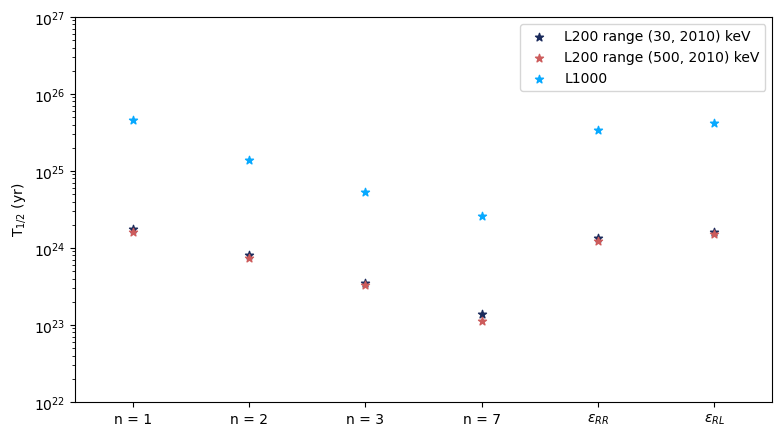

In [73]:
plt.figure(figsize=(9, 5))
plt.scatter(range(6), results_l200_0, marker='*', c='#1A2A5B',   label='L200 range (30, 2010) keV')
plt.scatter(range(6), results_l200_1, marker='*', c='indianred', label='L200 range (500, 2010) keV')
plt.scatter(range(6), results_l1000,  marker='*', c='#07A9FF',   label='L1000')
plt.xlim(-0.5, 5.5)
plt.ylim(1e22, 1e27)
plt.yscale('log')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['n = 1', 'n = 2', 'n = 3', 'n = 7', r'$\epsilon_{RR}$', r'$\epsilon_{RL}$'])
plt.ylabel(r'T$_{1/2}$ (yr)')
plt.show()

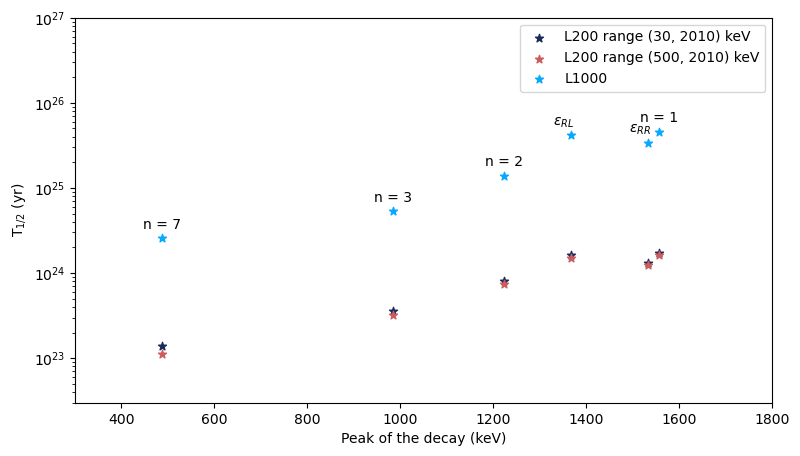

In [91]:
plt.figure(figsize=(9, 5))
plt.scatter(max_energies, results_l200_0, marker='*', c='#1A2A5B',   label='L200 range (30, 2010) keV')
plt.scatter(max_energies, results_l200_1, marker='*', c='indianred', label='L200 range (500, 2010) keV')
plt.scatter(max_energies, results_l1000,  marker='*', c='#07A9FF',   label='L1000')
for x, y, txt in zip(max_energies, results_l1000, ['n = 1', 'n = 2', 'n = 3', 'n = 7', r'$\epsilon_{RR}$', r'$\epsilon_{RL}$']):
    plt.text(x-40, y*1.3, txt)
plt.xlim(300, 1800)
plt.ylim(3e22, 1e27)
plt.yscale('log')
plt.xlabel('Peak of the decay (keV)')
plt.ylabel(r'T$_{1/2}$ (yr)')
plt.legend()
#plt.savefig('./images/majoron_comparison_with_L1000.pdf', bbox_inches='tight')
plt.show()